# Linearization Methods

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import scipy.stats as sst
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import namedtuple
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

### Exercise 1


-0.8324378683284922 -4.244107621898206 1.3976757345874835 -2.4941893364687084 3.4941893364687084 0.95


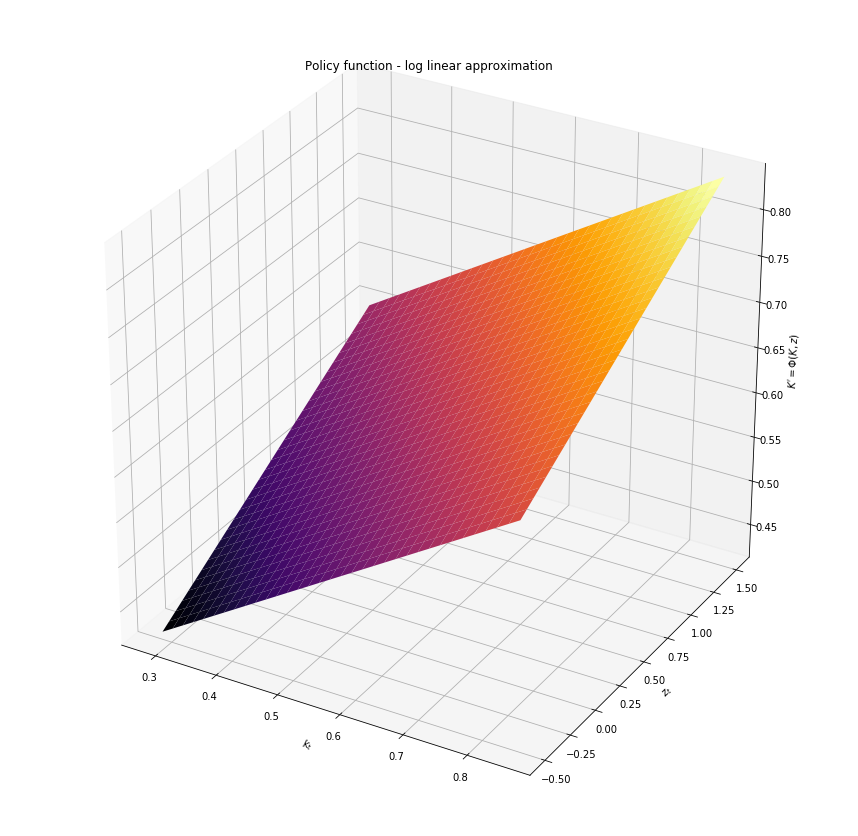

In [2]:
# Set the parameters
alpha  = 0.40
beta = 0.98
rho = 0.95
A = alpha*beta

def uhlig_params():
    k_bar = A**(1/1-alpha)
    F = 1/((k_bar**alpha-1)-1)
    G = (alpha + k_bar)/(k_bar - k_bar**alpha)
    H = alpha/(1-k_bar**(1-alpha))
    L = k_bar/(k_bar - k_bar**alpha)
    M = 1/(1-k_bar**(1-alpha))
    N = rho
    return F,G,H,L,M,N

def P_root(P):
    F,G,H,L,M,N = uhlig_params()
    error = (F*P**2) + G*P + H
    return error

def uhlig_coeffs():
    F,G,H,L,M,N = uhlig_params()
    P_guess = 0.5
    results = opt.root(P_root, P_guess, tol = 1e-10)
    P = results.x
    Q = -1*(L*N+M)/(F*N + F*P + G)
    return F,G,H,L,M,N,P,Q

F,G,H,L,M,N,P,Q = uhlig_coeffs()
k_bar = A**(1/1-alpha)
k_mesh = np.linspace(k_bar*0.5, k_bar*1.5, 100)
z_mesh = np.linspace(-0.5, 1.5, 100)

print(F, G, H, L, M, N)

x,y = np.meshgrid(k_mesh, z_mesh)
policy = np.empty((100,100))
for i in range(100):
    for j in range(100):
        policy[i,j] = (1-P)*k_bar + P*(k_mesh[i]) + Q*k_bar*z_mesh[j]
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, policy, rstride = 3, cstride = 3, cmap='inferno')
plt.title('Policy function - log linear approximation')
ax.set_xlabel("$k_t$")
ax.set_ylabel("$z_t$")
ax.set_zlabel("$K'= \Phi (K,z)$")
plt.show()

### Exercise 2

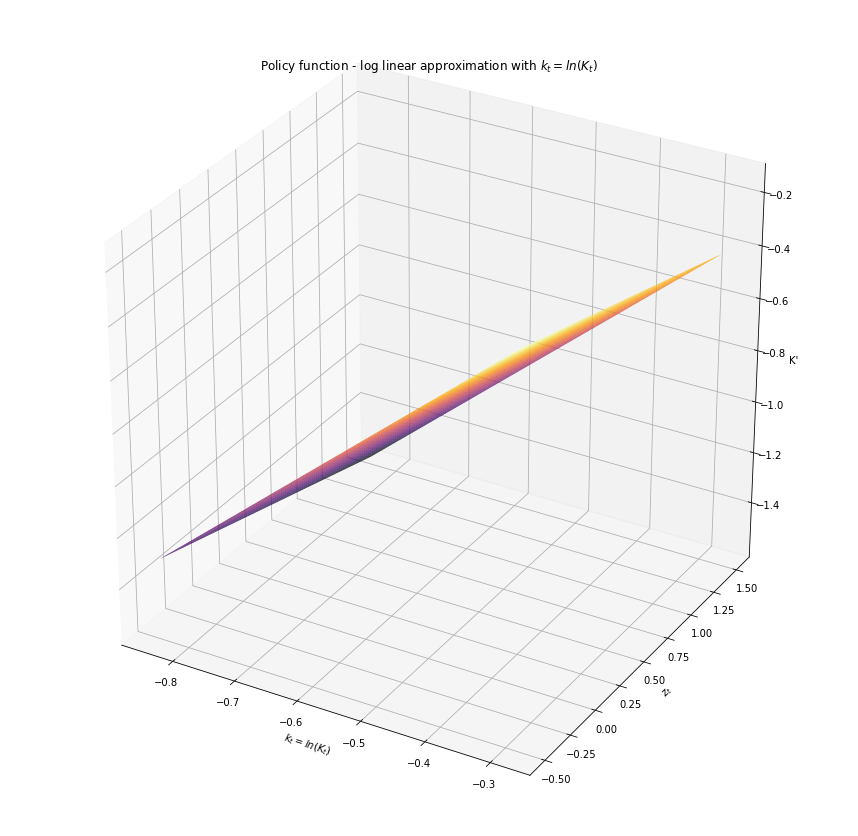

In [3]:
#Setting Parameters
alpha  = 0.40
beta = 0.98
rho = 0.95
A = alpha*beta

def uhlig_params():
    K_bar = A**(1/1-alpha)
    k_bar = np.log(K_bar)
    F = k_bar/(np.exp(alpha*k_bar)- np.exp(k_bar))
    G = k_bar*(alpha + np.exp((alpha-1)*k_bar))/(1- np.exp((alpha-1)*k_bar))
    H = (k_bar*alpha*np.exp(alpha*k_bar))/(np.exp(alpha*k_bar) - np.exp(k_bar))
    L = -(np.exp(k_bar))/(np.exp(alpha*k_bar) - np.exp(k_bar))
    M = (np.exp(alpha*k_bar))/(np.exp(alpha*k_bar)- np.exp(k_bar))
    N = rho
    return F,G,H,L,M,N 

def P_root(P):
    F,G,H,L,M,N = uhlig_params()
    error = (F*P**2) + G*P + H
    return error

def uhlig_coefficients():
    F,G,H,L,M,N = uhlig_params()
    P_guess = 0.5
    results = opt.root(P_root, P_guess, tol = 1e-10)
    P = results.x
    Q = -1*(L*N+M)/(F*N + F*P + G)
    return F,G,H,L,M,N,P,Q

F,G,H,L,M,N,P,Q = uhlig_coefficients()
K_bar = A**(1/1-alpha)
k_bar = np.log(K_bar)
k_mesh = np.linspace(k_bar*0.5, k_bar*1.5, 100)
z_mesh = np.linspace(-0.5, 1.5, 100)

x,y = np.meshgrid(k_mesh, z_mesh)
policy = np.empty((100,100))
for i in range(100):
    for j in range(100):
        policy[i,j] = (1-P)*k_bar + P*(k_mesh[i]) + Q*k_bar*z_mesh[j]
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, policy, rstride = 3, cstride = 3, cmap='inferno')
plt.title('Policy function - log linear approximation with $k_t = ln(K_t)$')
ax.set_xlabel("$k_t = ln(K_t)$")
ax.set_ylabel("$z_t$")
ax.set_zlabel("K'")
plt.show()

### Exercise 3
$E_t (F \tilde{X_{t+1}} + G \tilde{X_{t}} + H \tilde{X_{t-1}} + L \tilde{Z_{t+1}} + M \tilde{Z_{t}})= 0$
<br> Now,
<br> $\tilde{Z_{t}} = N \tilde{Z_{t-1}} + \epsilon_t$
<br> And,
<br> $\tilde{X_t} = P \tilde{X_{t-1}} + Q \tilde{Z_t}$
<br> Plugging in $Z_{t+1}$ we get,
<br> $E_t[F(P \tilde{X_t} + Q \tilde{Z_{t+1}}) + G(P \tilde{X_{t-1}} + Q \tilde{Z_t}) + H \tilde{X_{t-1}} + L \tilde{Z_{t+1}} + M \tilde{Z_{t}}] = 0$
<br> As $E_t(\epsilon_{t+1}) = 0$ for steady state, now removing the expectation and arranging common terms we get the result:

$[(FP + G)P + H]\tilde{X_{t-1}} + [(FQ + L)N + (FP + G)Q + M)\tilde{Z_t} = 0$

### Exercise 4


In [4]:
def Modeldefs(Xp, X, Y, Z, params):
    # unpack input vectors
    kp = Xp
    k = X
    l = Y
    z = Z
    
    # unpack params
    (alpha, beta, gamma, delta, tau, xi, a) = params
    Y = k**alpha * (np.exp(z)*l)**(1-alpha)
    w = (1-alpha)* Y/l
    r = alpha*Y/k
    T = tau*(w*l + (r-delta)*k)
    c = (w*l + (r - delta)*k) + k - kp
    i = delta * k
    u = (c**(1-gamma)-1)/(1-gamma) + a*(((1-l)**(1-xi))-1)/(1-xi)
    return Y, w, r, T, c, i, u

def Modeldyn(theta0, params):

    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    l = Y
    
    # find definitions for now and next period
    Y, w, r, T, c, i, u = Modeldefs(Xp, X, Y, Z, params)
    Yp, wp, rp, Tp, cp, ip, up = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    (alpha, beta, gamma, delta, tau, xi, a) = params
    E1 = c**(-gamma) - beta* cp**(-gamma) * ((1 - tau)*(rp - delta) + 1)
    E2 = a * (1-l)**(-xi) - w * (1 - tau) * c**(-gamma)
    return np.array([E1, E2])

# Set the parameters
gamma  = 2.5
xi = 1.5
beta = 0.98
alpha = 0.40
a = 0.5
delta = 0.10
tau = 0.05
z_bar = 0

# make parameter list to pass to functions
params = np.array([alpha, beta, gamma, delta, tau, xi, a])

#LinApp Parameters
Zbar = np.array([0.])
nx = 1
ny = 1
nz = 1
logX = 1
Sylv = 0

# take a guess for steady state values of k and ell
guessXY = np.array([.1, .25])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, lbar) = XYbar

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, lbar, lbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')
    
# find the steady state values for the definitions
Ybar, wbar, rbar, Tbar, cbar, ibar, ubar = \
    Modeldefs(kbar, kbar, lbar, 0., params)

# display all steady state values
print("Steady state value of the variables")
print ('kbar:   ', kbar)
print ('lbar:   ', lbar)
print ('Ybar:   ', Ybar)
print ('wbar:   ', wbar)
print ('rbar:   ', rbar)
print ('cbar:   ', cbar)
print ('ibar:   ', ibar)
print ('ubar:   ', ubar)

Steady state value of the variables
kbar:    4.225229026783573
lbar:    0.5797914531670038
Ybar:    1.2832261088325483
wbar:    1.327952768351271
rbar:    0.12148227712137966
cbar:    0.8607032061541906
ibar:    0.42252290267835735
ubar:    -0.7108726381177776


### Exercise 5


In [5]:
# Set value for "h" and Use the other parameters from problem 6
h = 0.0001

# assign X1 = X + h for each parameters
alpha1 = alpha + h
beta1 = beta + h
gamma1  = gamma + h
delta1 = delta + h
xi1 = xi + h
tau1 = tau + h
a1 = a + h

var_mat = np.zeros((7,7))
d_mat = np.zeros_like(var_mat)

# f(X) with params
for i in range(7):
    var_mat[i,:] = \
    Modeldefs(kbar, kbar, lbar, 0., params)

params1 = np.array([alpha1, beta, gamma, delta, tau, xi, a])
params2 = np.array([alpha, beta1, gamma, delta, tau, xi, a])
params3 = np.array([alpha, beta, gamma1, delta, tau, xi, a])
params4 = np.array([alpha, beta, gamma, delta1, tau, xi, a])
params5 = np.array([alpha, beta, gamma, delta, tau1, xi, a])
params6 = np.array([alpha, beta, gamma, delta, tau, xi1, a])
params7 = np.array([alpha, beta, gamma, delta, tau, xi, a1])

# f(X+h) (with changes in the respective items of params)
d_mat[0,:] = \
    Modeldefs(kbar, kbar, lbar, 0., params1)
d_mat[1,:] = \
    Modeldefs(kbar, kbar, lbar, 0., params2)
d_mat[2,:] = \
    Modeldefs(kbar, kbar, lbar, 0., params3)
d_mat[3,:] = \
    Modeldefs(kbar, kbar, lbar, 0., params4)
d_mat[4,:] = \
    Modeldefs(kbar, kbar, lbar, 0., params5)
d_mat[5,:] = \
    Modeldefs(kbar, kbar, lbar, 0., params6)
d_mat[6,:] = \
    Modeldefs(kbar, kbar, lbar, 0., params7)

# Derivatives as (f(X+h) - f(x))/h
d_mat = (d_mat - var_mat)/h

# Display the matrix of derivatives
rows = ["alpha", "beta", "gamma", "delta", "xi", "tau", "a"]
cols = ["y", "w", "r", "T", "c", "i", "u"]
df_dx = pd.DataFrame(data=d_mat, index= rows, columns=cols)
print("Steady state values of the derivatives:")
print(df_dx)

Steady state values of the derivatives:
              y         w         r         T         c         i         u
alpha  2.548946  0.424095  0.545073  0.127447  2.548946  0.000000  3.707373
beta   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
gamma  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 -0.013090
delta  0.000000  0.000000  0.000000 -0.211261 -4.225229  4.225229 -6.151532
xi     0.000000  0.000000  0.000000  0.860703  0.000000  0.000000  0.000000
tau    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 -0.252191
a      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 -1.085301


### Exercise 6


In [6]:
# The modeldef & Modeldyn functions and setting of the parameters would be the same as in Exercise 4
# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
   LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)

# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, NN, Zbar, Sylv)
print ('F: ', FF)
print ('G: ', GG)
print ('H: ', HH)
print ('L: ', LL)
print ('M: ', MM)
print ('N: ', NN)
print ('P: ', PP)
print ('Q: ', QQ)

F:  [[0.]]
G:  [[-22.52731982]]
H:  [[22.27702702]]
L:  [[0.]]
M:  [[3.00365877]]
N:  0.95
P:  [[0.35542591]]
Q:  [[0.07659587]]


### Exercise 7


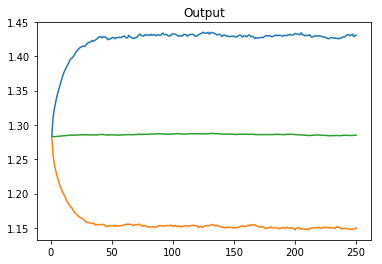

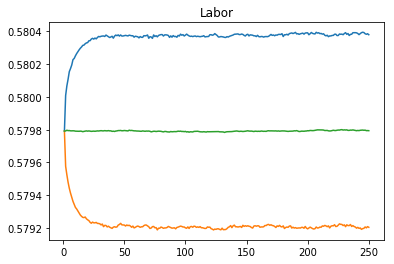

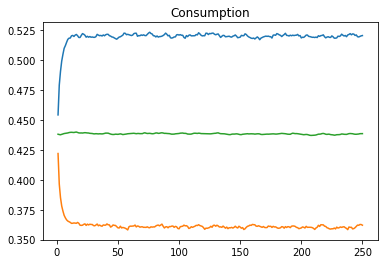

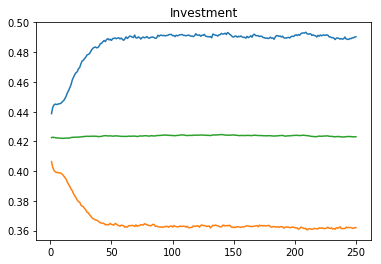

In [7]:
# Parameters
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.4
a = 0.5
delta = 0.10
zbar = 0
rho = 0.9
tau = 0.05
sigma = 0.02
simulations = 10000
periods = 250
PP = np.array([[0.915294, 0], [-0.191927,0]])
QQ = np.array( [[ 0.128997],[-0.01131]])

gdp = np.zeros((simulations, periods))
labor = np.zeros((simulations, periods))
invest = np.zeros((simulations, periods))
consum = np.zeros((simulations, periods))

for i in range(simulations):
    Z = np.zeros((periods+1))
    K = np.zeros((periods+1))
    L = np.zeros((periods+1))
    e_z = np.random.normal(0, scale = sigma, size=(periods + 1))
    for j in range(1, periods+1):
        Z[j] = NN * Z[j - 1] + e_z[j]
        K[j] = PP[0, 0] * K[j - 1] + QQ[0, 0] * Z[j] 
        L[j] = PP[1, 0] * L[j - 1] + QQ[1, 0] * Z[j]

    K = kbar * np.exp(K)
    L = lbar * np.exp(L)

    Z = Z[:-1]
    I = K[:-1] - (1 - delta)*K[1:]
    K = K[:-1]
    L = L[:-1]
    Y = (K**alpha) * (((np.exp(Z)*L)**(1 - alpha)))
    W = (1 - alpha)* np.exp(Z)**(1 - alpha) * (K**alpha) * (L**(-alpha))
    R = alpha*((L*np.exp(Z))**(1 - alpha))* K**(alpha - 1)
    C  = W*L + (R - delta) * K - I
    
    gdp[i,:] = Y
    labor[i,:] = L
    invest[i,:] = I
    consum[i,:] = C

x = np.linspace(1,250,250)

conf95 = np.percentile(gdp, 95, axis=0)
conf5 = np.percentile(gdp, 5, axis=0)
mean = np.mean(gdp, axis=0)
plt.plot(x, conf95)
plt.plot(x, conf5)
plt.plot(x, mean)
plt.title("Output")
plt.show()

conf95 = np.percentile(labor, 95, axis=0)
conf5 = np.percentile(labor, 5, axis=0)
mean = np.mean(labor, axis=0)
plt.plot(x, conf95)
plt.plot(x, conf5)
plt.plot(x, mean)
plt.title("Labor")
plt.show()

conf95 = np.percentile(consum, 95, axis=0)
conf5 = np.percentile(consum, 5, axis=0)
mean = np.mean(consum, axis=0)
plt.plot(x, conf95)
plt.plot(x, conf5)
plt.plot(x, mean)
plt.title("Consumption")
plt.show()

conf95 = np.percentile(invest, 95, axis=0)
conf5 = np.percentile(invest, 5, axis=0)
mean = np.mean(invest, axis=0)
plt.plot(x, conf95)
plt.plot(x, conf5)
plt.plot(x, mean)
plt.title("Investment")
plt.show()

### Exercise 8


In [8]:
name = ["Output", "Labor", "Consumption", "Investment"]
data = [gdp, labor, consum, invest]
for i in range(len(data)): 
    mean = data[i].mean(axis = 1)
    vol = data[i].std(axis = 1)
    var = mean / vol
    rel_vol = vol / data[0].std(axis = 1)
    persis = np.corrcoef(data[i][0][:-1],data[i][0][1:])
    cycl = np.corrcoef(data[i][0],data[0][0])
    print(name[i])
    print("Mean:", np.mean(mean))
    print("Error:", sst.sem(mean))
    print("Volatility:", np.mean(vol))
    print("Error:",sst.sem(vol))
    print("Coef of Variation:", np.mean(var))
    print("Error:",sst.sem(var))
    print("Rel Variation:", np.mean(rel_vol))
    print("Error:",sst.sem(rel_vol))
    print("Persistance:", np.mean(persis))
    print("Cyclicality:", np.mean(cycl))

Output
Mean: 1.2858423071452083
Error: 0.0003564700371775565
Volatility: 0.07178922448714632
Error: 0.0001726062914987396
Coef of Variation: 18.935527173753076
Error: 0.04512074824721859
Rel Variation: 1.0
Error: 0.0
Persistance: 0.9836024997221862
Cyclicality: 1.0
Labor
Mean: 0.5797916153036217
Error: 1.2880301099440869e-06
Volatility: 0.00031854668481458905
Error: 5.837697770917992e-07
Coef of Variation: 1880.4348643136655
Error: 3.390332693523564
Rel Variation: 0.004502198308627756
Error: 3.2924846014378883e-06
Persistance: 0.9504820933023619
Cyclicality: 0.028792899035007175
Consumption
Mean: 0.438480076397603
Error: 7.16490915541106e-05
Volatility: 0.047246643708579915
Error: 6.370205766198132e-05
Coef of Variation: 9.444768398223951
Error: 0.012464132059953845
Rel Variation: 0.6802428944579547
Error: 0.0011241626837095882
Persistance: 0.9647333546507793
Cyclicality: 0.7992804648675744
Investment
Mean: 0.42366671977936093
Error: 0.0001439733150686799
Volatility: 0.0335047781551043

### Exercise 9


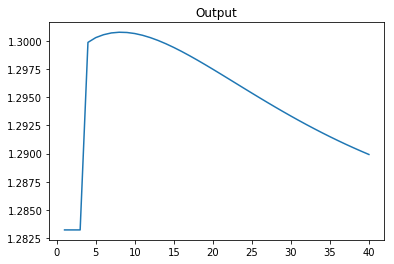

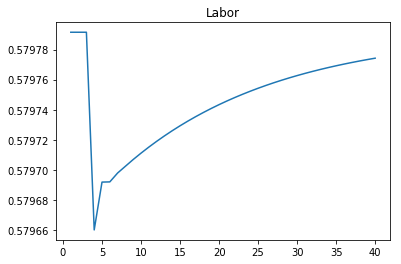

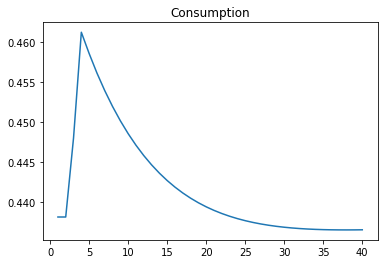

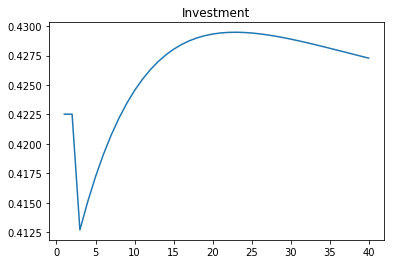

In [9]:
periods = 40
Z = np.zeros((periods+1))
K = np.zeros((periods+1))
L = np.zeros((periods+1))
e_z = np.zeros((periods+1))
e_z[3] = 0.02 
for j in range(1, periods+1):
    Z[j] = NN * Z[j - 1] + e_z[j]
    K[j] = PP[0, 0] * K[j - 1] + QQ[0, 0] * Z[j] 
    L[j] = PP[1, 0] * L[j - 1] + QQ[1, 0] * Z[j]

K = kbar * np.exp(K)
L = lbar * np.exp(L)
Z = Z[:-1]
I = K[:-1] - (1 - delta)*K[1:]
K = K[:-1]
L = L[:-1]
Y = (K**alpha) * (((np.exp(Z)*L)**(1 - alpha)))
W = (1 - alpha)* np.exp(Z)**(1 - alpha) * (K**alpha) * (L**(-alpha))
R = alpha*((L*np.exp(Z))**(1 - alpha))* K**(alpha - 1)
C  = W*L + (R - delta) * K - I

data = np.array([Y,L,C,I])
name = np.array(["Output","Labor", "Consumption", "Investment"])
for i in range(len(data)):
    x = np.linspace(1,periods, periods)
    plt.plot(x, data[i])
    plt.title(name[i])
    plt.show()